In [4]:
import pandas as pd
df = pd.read_csv("dataset/movies_data_processed_v4.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   genres           1958 non-null   object 
 1   rating           1958 non-null   float64
 2   no_of_votes      1958 non-null   int64  
 3   meta_score       1958 non-null   float64
 4   release_date     1958 non-null   float64
 5   gross            1958 non-null   float64
 6   budget           1958 non-null   float64
 7   countries        1958 non-null   object 
 8   log_budget       1958 non-null   float64
 9   log_no_of_votes  1958 non-null   float64
 10  log_gross        1958 non-null   float64
 11  log_gross_bin    1958 non-null   int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 183.7+ KB


In [3]:
df

,genres,rating,no_of_votes,meta_score,release_date,gross,budget,countries,log_budget,log_no_of_votes,log_gross,log_gross_bin
0,"Martial Arts, Action, Comedy",5.3,6800,34.0,2025.0,17235040.0,18000000.0,United States,16.705882,8.824825,16.662455,3
1,"Action, Drama, Romance, Thriller, Western",6.5,107000,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",17.281246,11.580593,16.740635,3
2,"Animal Adventure, Computer Animation, Fairy Ta...",7.8,200000,73.0,2022.0,481757663.0,90000000.0,"United States, Japan",18.315320,12.206078,19.992952,9
3,"Sci-Fi Epic, Space Sci-Fi, Action, Adventure, ...",7.6,524000,52.0,1997.0,263920180.0,26000000.0,"France, United Kingdom",17.073607,13.169249,19.391157,8
4,"Sci-Fi Epic, Superhero, Urban Adventure, Actio...",7.4,195000,82.0,1978.0,300478449.0,55000000.0,"United States, United Kingdom, Switzerland, Pa...",17.822844,12.180760,19.520887,8
...,...,...,...,...,...,...,...,...,...,...,...,...
2037,"Romantic Epic, Western Epic, Adventure, Drama,...",6.6,70000,49.0,1992.0,137783840.0,60000000.0,United States,17.909855,11.156265,18.741197,7
2038,"Drama, Western",7.3,67000,61.0,1985.0,41410568.0,6900000.0,United States,15.747032,11.112463,17.539047,4
2039,"Buddy Comedy, Martial Arts, Action, Adventure,...",6.6,138000,77.0,2000.0,99274467.0,55000000.0,"United States, Hong Kong",17.822844,11.835016,18.413399,6
2040,"Drama, Western",5.8,12000,42.0,2016.0,20672.0,10000000.0,United States,16.118096,9.392745,9.936584,0


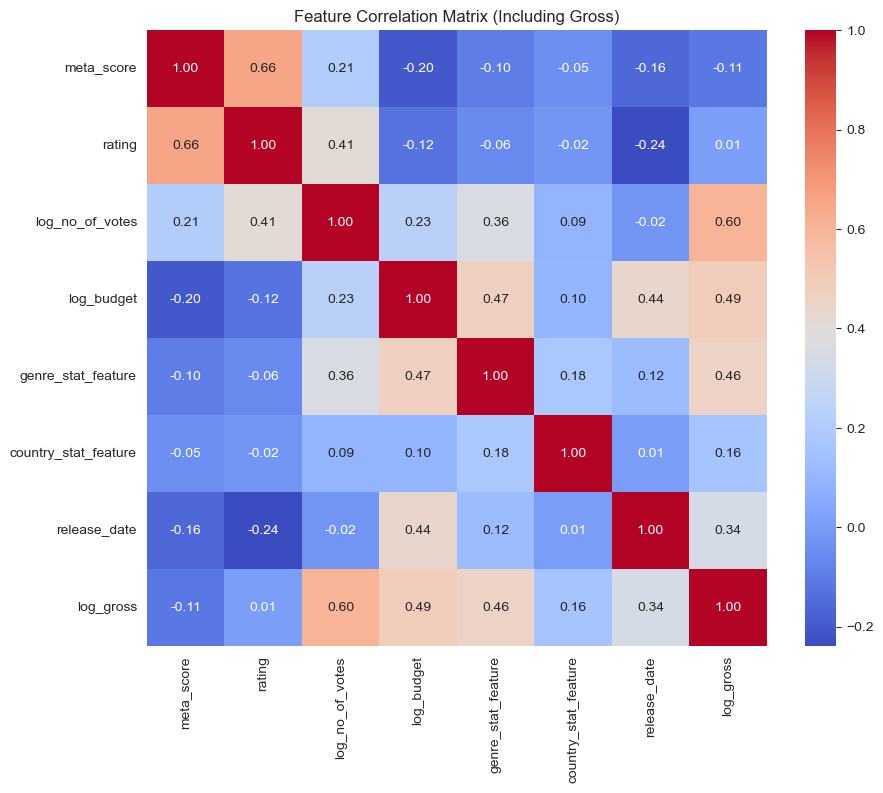

In [27]:
from data import _split_column, _compute_target_encoding, _apply_target_encoding

import seaborn as sns
import matplotlib.pyplot as plt



for col in ['genres', 'countries']:
    df[f'{col}_list'] = _split_column(df, col)

# Ánh xạ encoding theo target
genre_encoding = _compute_target_encoding(df['genres_list'], df['gross'])
country_encoding = _compute_target_encoding(df['countries_list'], df['gross'])

# Tạo đặc trưng thống kê từ encoding
_apply_target_encoding(df, df['genres_list'], genre_encoding, 'genre_stat_feature')
_apply_target_encoding(df, df['countries_list'], country_encoding, 'country_stat_feature')


# Select features including 'gross'
features = ['meta_score', 'rating', 'log_no_of_votes', 'log_budget',
            'genre_stat_feature', 'country_stat_feature',
            'release_date', 'log_gross']

# Calculate the correlation matrix
correlation_matrix = df[features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Matrix (Including Gross)")
plt.show()

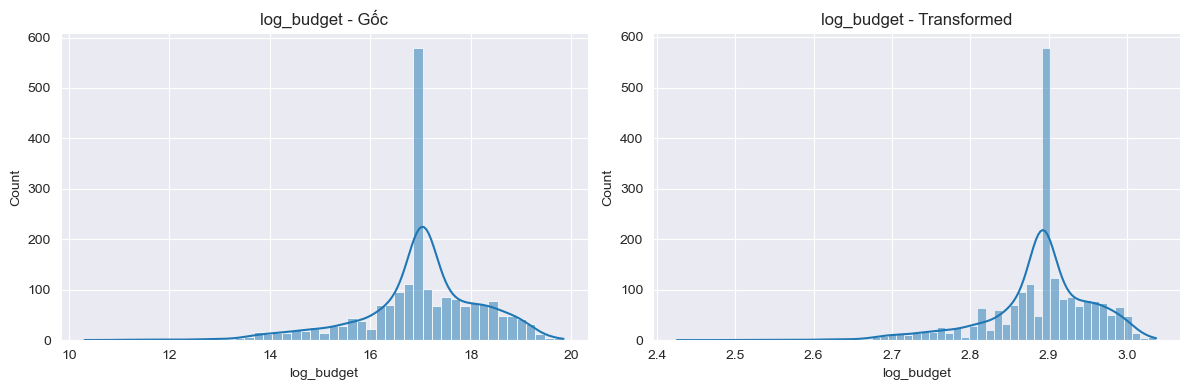

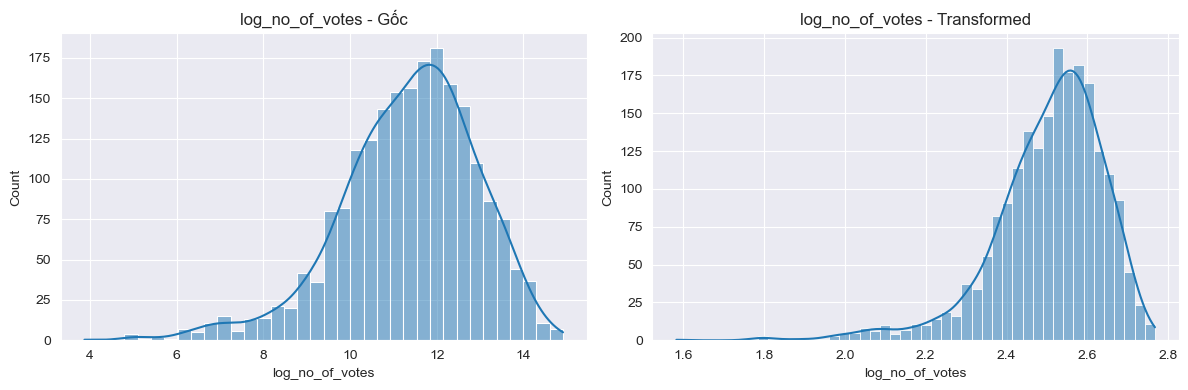

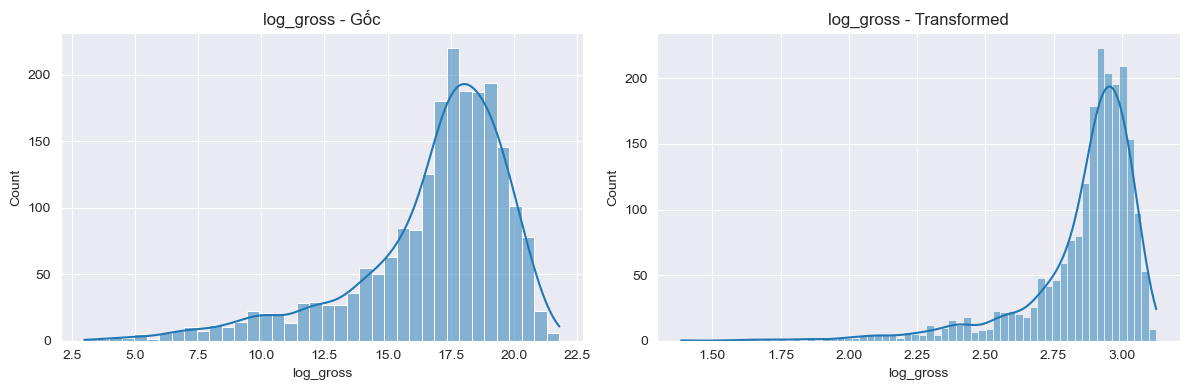

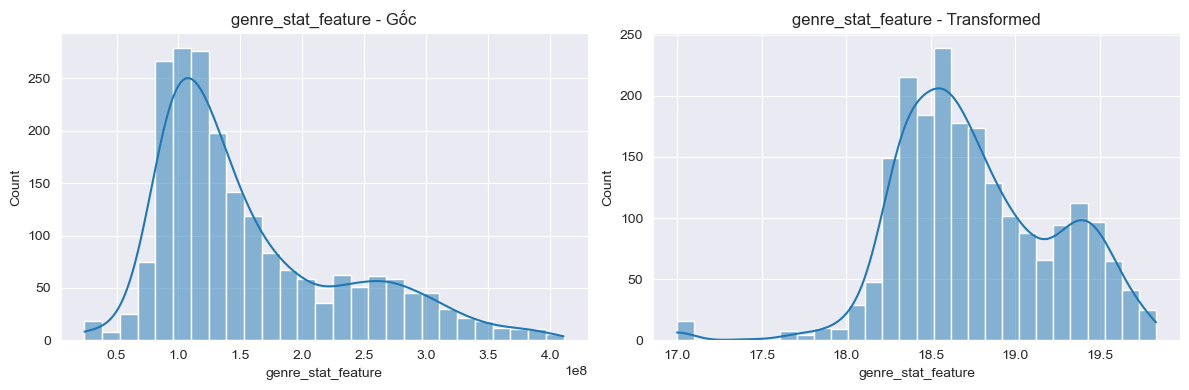

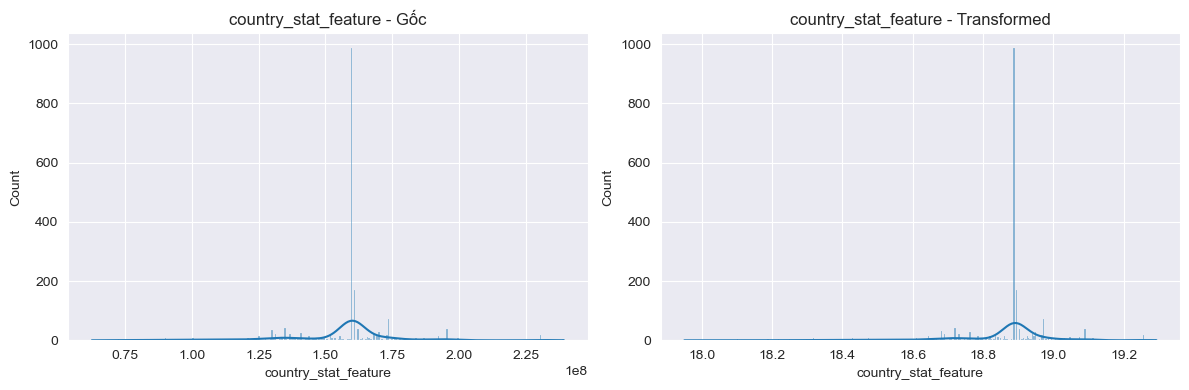

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
for col in ['log_budget', 'log_no_of_votes', "log_gross", "genre_stat_feature", "country_stat_feature"]:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} - Gốc")

    plt.subplot(1, 2, 2)
    sns.histplot(np.log1p(df[col]), kde=True)
    plt.title(f"{col} - Transformed")

    plt.tight_layout()
    plt.show()